# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import numpy as np
import pandas as pd
import copy
from dbclass import TrainDB
from torchvision import datasets, transforms
import cProfile



# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Defining The Neural Network

In [2]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
def f(X):
    if np.ndim(X) >1:
        return np.trace(X)
    else:
        return 0
def g(X):
    if np.ndim(X) >1:
        return np.trace(X)+10
    else:
        return 10
d = {'trace':f, 'trace2':g}

In [3]:
db = TrainDB(model,trainloader,criterion,dictf=d,dictg=d,batchfreq=100,weird=True)

### Core Training Of Neural Network

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
time0 = time()
epochs = 2
for e in range(epochs):
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        prev_state = copy.deepcopy(model.state_dict())

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward(create_graph=True,retain_graph=True)
        #And optimizes its weights here
        optimizer.step()
        db.step(e,i,prev_state,model,loss.item())
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
       # print((model[0].weight))
print("\nTraining Time (in minutes) =",(time()-time0)/60)



Epoch 0 - Training loss: 0.36224448994230996
Epoch 1 - Training loss: 0.16794797475102233

Training Time (in minutes) = 0.40390545129776


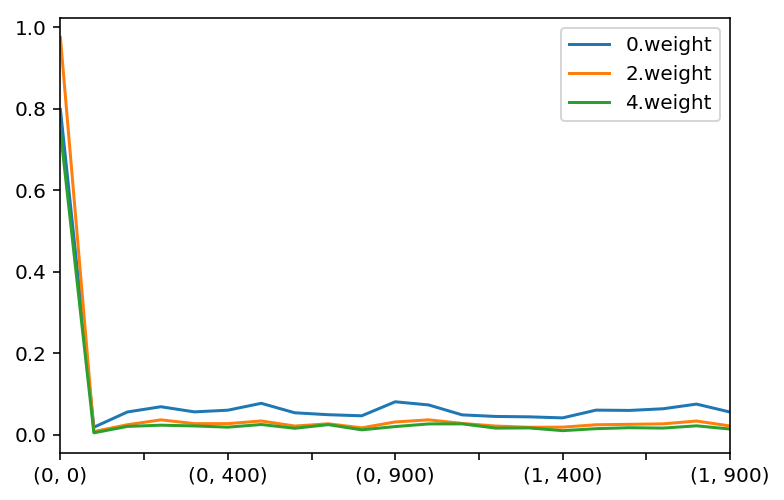

In [5]:
table1 = db.tweight
table2 = db.tnorm
table3 = db.tdiffnorm
table4 = db.tdictf
table5 = db.tdictg


#table3[['0.weight', '2.weight', '4.weight']][:].plot()
table3[['0.weight', '2.weight', '4.weight']].plot()
#table2.loc[1,'0.weight']
#table1.loc[1]
#table4

In [6]:
table5

0.weight-trace  0.weight-trace2  0.bias-trace  0.bias-trace2  \
0 0         -0.001374         9.998626             0             10   
  0          0.000235        10.000235             0             10   
  100        0.001679        10.001679             0             10   
  200        0.002284        10.002284             0             10   
  300        0.003528        10.003528             0             10   
  400        0.000707        10.000707             0             10   
  500        0.001790        10.001790             0             10   
  600        0.002176        10.002176             0             10   
  700       -0.001479         9.998521             0             10   
  800       -0.002087         9.997913             0             10   
  900        0.001370        10.001370             0             10   
1 0         -0.000228         9.999772             0             10   
  100        0.000473        10.000473             0             10   
  200       -0.002623         9.997377             0             10   
  300       -0.002116         9.997884             0             10   
  400       -0.002713         9.997287             0             10   
  500       -0.001140         9.998860             0             10   
  600       -0.000223         9.999777             0             10   
  700       -0.001155         9.998845             0             10   
  800        0.000378        10.000378             0             10   
  900        0.001377        10.001377             0             10   

       2.weight-trace  2.weight-trace2  2.bias-trace  2.bias-trace2  \
0 0          0.553828        10.553828             0             10   
  0         -0.000725         9.999275             0             10   
  100        0.004975        10.004975             0             10   
  200        0.004541        10.004541             0             10   
  300       -0.002495         9.997505             0             10   
  400        0.001299        10.001299             0             10   
  500       -0.003804         9.996196             0             10   
  600        0.003132        10.003132             0             10   
  700        0.004614        10.004614             0             10   
  800        0.000948        10.000948             0             10   
  900       -0.001343         9.998657             0             10   
1 0          0.004818        10.004818             0             10   
  100        0.001854        10.001854             0             10   
  200        0.001739        10.001739             0             10   
  300        0.000882        10.000882             0             10   
  400        0.002843        10.002843             0             10   
  500        0.002501        10.002501             0             10   
  600        0.002083        10.002083             0             10   
  700        0.003449        10.003449             0             10   
  800       -0.001125         9.998875             0             10   
  900       -0.000910         9.999090             0             10   

       4.weight-trace  4.weight-trace2  4.bias-trace  4.bias-trace2  
0 0         -0.149158         9.850842             0             10  
  0          0.000873        10.000873             0             10  
  100       -0.003884         9.996116             0             10  
  200       -0.000676         9.999324             0             10  
  300       -0.003129         9.996871             0             10  
  400        0.000401        10.000401             0             10  
  500        0.000286        10.000286             0             10  
  600       -0.000075         9.999925             0             10  
  700       -0.004067         9.995933             0             10  
  800        0.000505        10.000505             0             10  
  900        0.001941        10.001941             0             10  
1 0         -0.002966         9.997034   

##### 

In [7]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

109386


In [ ]:
torch.from_numpy(table1.loc[(0,10),'0.weight'].values[0]).requires_grad

In [22]:
print((str((table1.memory_usage(True,True).sum())/1000000) )  + ' MB' )
print((str((table2.memory_usage(True,True).sum())/1000)) + ' KB' )
print((str((table3.memory_usage(True,True).sum())/1000)) + ' KB' )

9.202706 MB
1.178 KB
1.178 KB


### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

In [ ]:
print(db.currnetwork.state_dict()['0.weight'])
print(db.reconstructnet(None,None).state_dict()['0.weight'])

In [5]:
#db.criterion = torch.nn.functional.nll_loss
import cProfile
cProfile.run('db.ithhess_eigenval(k=4,opt=True)')

[hessian_eigenthings] beginning deflated power iteration
[hessian_eigenthings] computing eigenvalue/vector 1 of 4
[hessian_eigenthings] eigenvalue 1: 4.4717==================>......]  Step: 1s600ms | Tot: 26s303ms | power iter error: 0.0001                                                       19/20 
[hessian_eigenthings] computing eigenvalue/vector 2 of 4
         4883172 function calls (4871126 primitive calls) in 42.007 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   42.007   42.007 <string>:1(<module>)
   120000    0.126    0.000    0.172    0.000 Image.py:2329(_check_size)
    60000    0.194    0.000    0.812    0.000 Image.py:2347(new)
    60000    0.221    0.000    1.536    0.000 Image.py:2421(frombuffer)
    60000    0.503    0.000    2.069    0.000 Image.py:2482(fromarray)
    60000    0.231    0.000    0.330    0.000 Image.py:461(_getencoder)
   180000    0.179    0.000    0.179    0.

KeyboardInterrupt: 

In [5]:
import cProfile
cProfile.run('db.ithhess_eigenval(k=4,opt=False)')

[hessian_eigenthings] beginning deflated power iteration
[hessian_eigenthings] computing eigenvalue/vector 1 of 4
         16407654 function calls (16239168 primitive calls) in 46.737 seconds4s758ms | Tot: 30s173ms | power iter error: 0.5404                                                      3/20 

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   46.737   46.737 <string>:1(<module>)
   377478    0.405    0.000    0.551    0.000 Image.py:2329(_check_size)
   188739    0.629    0.000    2.608    0.000 Image.py:2347(new)
   188739    0.730    0.000    4.937    0.000 Image.py:2421(frombuffer)
   188739    1.613    0.000    6.650    0.000 Image.py:2482(fromarray)
   188738    0.745    0.000    1.069    0.000 Image.py:461(_getencoder)
   566217    0.567    0.000    0.567    0.000 Image.py:539(__init__)
   566214    0.107    0.000    0.107    0.000 Image.py:559(size)
   377478    0.714    0.000    1.120    0.

KeyboardInterrupt: 